<a href="https://colab.research.google.com/github/thainazanfolin/ml_marketing/blob/main/Predi%C3%A7%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Descrição do projeto </h1>
Com esse projeto, vamos conseguir prever o quanto os clientes gastma em um site específico, a partir de dados anteriories. <br>
Com isso, é possível planejar e organizar estratégias e investimento em marketing. Além disso, também é possível entender os diferentes perfis de clientes que existem no e-commerce, usando dados passados para entender as previsões do futuro. <br>
Esse projeto está sendo desenvolvido com o **Curso de Data Analytics: Machine Learning no Marketing Digital, da Alura. **

<h1>Vamos começar! </h1>
* importando o pandas <br>
* importando o arquivo de treinamento

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("train.csv")

In [22]:
df.head() #mostra os primeiros registros da tabela

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [23]:
df.shape #vamos ver o tamanho dessa base

(12283, 12)

In [24]:
df.fullVisitorId.unique() #vai trazer os valores ÚNICOS da coluna FullVisitorId. Ou seja, traz apenas 1 vez o ID do usuario, mesmo que ele apareça mais vezes. Isso acontece porque o mesmo usuário pode acessar várias vezes, ficando registrado

array([9674781571160116268, 8590648239310839049, 9772828344252850532, ...,
        696320405243257438, 5437703324867866371, 2905034275926274980],
      dtype=uint64)

In [25]:
len(df.fullVisitorId.unique()) #vamos ver quantos IDs tem dentro do array, ou, em outras palavras, a LENGHT DO ARRAY

9996

In [26]:
df.dtypes #tipos de cada coluna

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

Podemos identificar alguns problemas nessas identificações. Por exemplos, a coluna DATA foi identificada como INTEIRO, sendo que, na verdade, é um tipo DATA (no caso, vamos utilizar em string, para conseguir usar SLICE e encontrar o que queremos).<br> O ID, que pode ser identificado como STRING, está identificado como INTEIRO, o que também pode dificultar a busca. <br>
<h3> Resolvendo o problema</h3>
- mudar DATA de INT -> STRING<br>
- mudar ID de INT -> STRING<br>
- fullVisitorDI de INT -> STRING

In [27]:
df = pd.read_csv('train.csv', dtype={'date':object, 'fullVisitorId': object, 'visitId': object}) #já estamos lendo o CSV definindo o tipo das colunas detalhadas

In [28]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

<h2>Observações importantes</h2>
As ferramentas de Web Analytics podem não ser tão acuradas quando o assunto é definição do USUÁRIO. Ela pode entender, por exemplo, que o acesso vindo de um mesmo computador é da mesma pessoa, mesmo sendo de pessoas diferentes. Também há a dificuldade de entender que um mesmo usuário pode acessar de diferentes dispositivos (criando uma sessão nova, para esse mesmo usuário). <br>Esse tipo de problemática é comum em ferramentas de web analytics, o que faz com que, na hora de realizar o treinamento e as predições de gasto <b>por usuário</b>, seja preciso <b>preparar a base criando variáveis que considerem o USUÁRIO e não a visita</b>.

<h2>Usando dicionários</h2>
Formato CHAVE-VALOR.


In [29]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [30]:
type(df.device.iloc[0]) #qual o tipo

str

In [31]:
import json

In [32]:
json.loads(df.device.iloc[0]) #json consegue identificar os pares de chave-valor e separar por linhas -> identificou como dict

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [33]:
[json.loads(linha) for linha in df.device] #vai ler cada linha e retornar uma lista de linhas com cada valor lida

[{'browser': 'Chrome',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Windows',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobile': False,
  'mobileDeviceBranding': 'not available in demo dataset',
  'mobileDeviceModel': 'not available in demo dataset',
  'mobileInputSelector': 'not available in demo dataset',
  'mobileDeviceInfo': 'not available in demo dataset',
  'mobileDeviceMarketingName': 'not available in demo dataset',
  'flashVersion': 'not available in demo dataset',
  'language': 'not available in demo dataset',
  'screenColors': 'not available in demo dataset',
  'screenResolution': 'not available in demo dataset',
  'deviceCategory': 'desktop'},
 {'browser': 'Chrome',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Macintosh',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobile

In [34]:
pd.DataFrame([json.loads(linha) for linha in df.device]) #criando um dataframe a partir da lista -> cria uma tabela a partir da coluna DEVICE

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [35]:
dicionarios=['device', 'geoNetwork', 'trafficSource', 'totals']

In [36]:
for coluna in dicionarios: #vai rodar as linhas das colunas que reconhecemos como dicionario e fazer o append no dataframe
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [37]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


Como vimos, o python indicous que uma das colunas está em dict e, por isso, não é possível verificar seu tamanho. <br>
Para resolver esse ero, antes, é preciso avaliar se os valores dessa coluna específica são relevantes. <br>
vamos: <br>
 - descobrir qual coluna deu erro<br>
 - verificar os dados dessa coluna<br>
 - avaliar sua relevancia

In [38]:
coluna #vamos ver em qual coluna o for parou

'totals'

In [39]:
df['adwordsClickInfo'][0] #vamos verificar o que tem no primeiro registro dessa coluna

{'criteriaParameters': 'not available in demo dataset'}

Analisando isso, vemos que não é algo relevante, já que a ferramente de web analytics não trouxe uma definição exata (provavelmente para manter a privacidade do usuario e seus dados). <br>
Por isso, vamos<b> excluir essa coluna</b> já que não há razão para mantê-la.  

In [40]:
df.drop('adwordsClickInfo', axis=1, inplace=True) #fazendo drop (excluindo) a coluna (axis=1) de adwordsClickInfo e já atualizando o dataframe (inplace)

Vamos rodar o for das colunas novamente para verificar se ainda há erros.

In [41]:
for coluna in df.columns:
  print(coluna+':'+str(len(df[coluna].unique())))

channelGrouping:8
date:366
device:59
fullVisitorId:9997
geoNetwork:2858
sessionId:12276
socialEngagementType:1
totals:714
trafficSource:666
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147


Quando verificamos o tamanho de cada linha, vemos que muitas têm apenas UM VALOR. Se temos apenas um valor para todas as linhas, entende-se que esse dado não vai trazer nenhuma informação relevante, já que não há variação para indicar se o usuário vai gastar menos ou mais.<br> Por isso, vamos excluir esses dados.

In [42]:
coluna_na =[]

Para cada coluna que vamos verificar, ver se o valor é 1. Se for, excluir.

In [43]:
for coluna in df.columns:
  print(coluna+':'+str(len(df[coluna].unique())))
  if len(df[coluna].unique()) ==1: #se o valor unico da coluna for IGUAL A 1, coloque na lista da variavel 'coluna_na' / estamos separando os dados
    coluna_na.append(coluna)

channelGrouping:8
date:366
device:59
fullVisitorId:9997
geoNetwork:2858
sessionId:12276
socialEngagementType:1
totals:714
trafficSource:666
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147


In [44]:
coluna_na #vamos ver o que foi adicionado na coluna_na, seguindo a regra anterior -> essas são as colunas que tem apenas um valor

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

Essas são as colunas que tem apenas um valor. Vamos exclui-las do dataframe

In [45]:
df.drop(coluna_na, axis=1, inplace=True)

In [46]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,totals,trafficSource,visitId,visitNumber,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,...,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


**<h2>Feature engineering: criando as variáveis que vão treinar o algoritmo e criar o modelo de ML**

Foco no USUÁRIO <br>
Variáveis quantitavias: os que mais interagiram, os que mais compraram, etc
<br>
**Quatro variáveis quantitativas**<br>
1. newVisits: mostra se é a primeira visita do usuário ao site ou não. **Será 0 ou 1 (quado for a primeira visita)**<br>
2. pageViews: quantas páginas o usuário viu naquela seção. <br>
3. bounces: rejeição. Visita que não gerou dados. <br>
4. hits: volume de interação que o Google recebeu do site (eventos setados no analytics)<br>


<h3>Corrigindo as variáveis quantiativas<h3>

In [47]:
df.dtypes #verificando os tipos das variaveis atuais

channelGrouping       object
date                  object
device                object
fullVisitorId         object
geoNetwork            object
sessionId             object
totals                object
trafficSource         object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRev

In [48]:
quant = ['bounces', 'hits','newVisits', 'pageviews', 'transactionRevenue'] #array com as variaveis que vamos utilizar

In [49]:
for coluna in quant: #vai passar por cada um dos valores do array e transforma-los em tipo FLOAT ou INT
  df[coluna] = pd.to_numeric(df[coluna]) #to_numeric é uma função do pandas


In [50]:
df.dtypes #verificando a troca

channelGrouping        object
date                   object
device                 object
fullVisitorId          object
geoNetwork             object
sessionId              object
totals                 object
trafficSource          object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits 

<h3>Variáveis resposta<h3><br>


In [51]:
df.transactionRevenue #verificando como a variavel resposta está

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12278   NaN
12279   NaN
12280   NaN
12281   NaN
12282   NaN
Name: transactionRevenue, Length: 12283, dtype: float64

O NaN (Not a Number) pode estar definido dessa forma por diversos motivos: falha, valor nulo, etc<br>
É preciso tratar essa variável pois muitos modelos não aceitam o tipo NaN como variável resposta. <br>
**Como fazer isso:**<br>
É preciso antes de tudo entender qual é o problema de negócio e o que os dados significam <br>
Nesse caso, ao procurarmos apenas os registros com valores não-NaN, é possível ver que existem registros válidos nessa variável. Porém, ao somar quantos NaN existem nessa variáveis, encontra-se que a maioria dos registros dessa variável está NaN. Conhecendo o problema de negócio, sabemos que a maioria dos acessos não converte em vendas. Logo, os registros NaN são aquelas seções sem vendas, enquanto os que tem registro com valor, representam o valor gasto naquela seção. <br>
Considerando isso, podemos, então, zerar os NaN, para que o modelo não seja treinado com NaN, e sim com ZERO, já que é a maioria dos registros. <br>
Vamos ver tudo isso sendo feito abaixo.


In [52]:
df.transactionRevenue.value_counts() #soma dos valores que existem nessa variavel. Porém, o NaN não aparece, já que não é um dado numerico contabilizado

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
              ..
22490000.0     1
74850000.0     1
32490000.0     1
239880000.0    1
25240000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [53]:
df.transactionRevenue.isna() #descobrindo quantos valores NaN temos nos registros dessa variavel

0        True
1        True
2        True
3        True
4        True
         ... 
12278    True
12279    True
12280    True
12281    True
12282    True
Name: transactionRevenue, Length: 12283, dtype: bool

In [54]:
df.transactionRevenue.isna().sum() #somando os que são NaN para vermos a quantidade. Ele entenda True como NaN e false como não-NaN

12119

In [55]:
df.shape #relembrando a quantidade de registros (linhas) do dataframe

(12283, 35)

Considerando que o dataframe tem 12.283 registros e, desses, 12.119 estão com NaN, conseguimos identificar a problemática: a grande maioria dos dados está sem registro numérico, pois não houve compra dentro daquela sessão de acesso. Isso também parte de um conhecimento de negócio: é sabido que a grande maioria dos acessos não convertem em vendas. <br>
Com isso, podemos transformar o NaN em zero, antes de treinar o modelo.

In [56]:
df.transactionRevenue.fillna(0, inplace=True) #preenchendo o NaN para zero, pois isso é o que mais adequa o dataframe de acordo com o problema de negócio

In [57]:
df.transactionRevenue

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [58]:
df.transactionRevenue.value_counts()

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

Outro ponto importante: os valores das compras estão muito grandes, o que não faria sentido nas compras. <br>
Usando a documentação do Google para suas próprias ferramentas de análise, lá está definido que **transactionsRevenue estão multiplicados por 10 elevado a 6 (1 milhão)**. <br>
Para trabalhar com valores reais e próximos dos usuais, vamos tratar esses dados para retorná-los aos valores reais.

In [59]:
df.transactionRevenue = df.transactionRevenue.astype(float)

In [60]:
df.transactionRevenue = df.transactionRevenue/1000000 #dividindo todos os valores dessa coluna por 1 milhao para retornar ao valor normal

In [61]:
df.transactionRevenue.value_counts()

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

<h2>Criando as variáveis para alimentar o modelo</h2>
Retomando as informações: cada linha do df mostra um registro de sessão de usuários. Logo, temos 12.283 (df.shape) registros. Também sabemos que temos mais sessões do que usuários, então vamos ver quantos fullVisitosId temos (id do visitante)

In [62]:
df.shape

(12283, 35)

In [63]:
len(set(df.fullVisitorId))

9997

In [64]:
df.groupby('fullVisitorId').sum() #as somas das colunas de cada visitorID

<ipython-input-64-0c811b0af9c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('fullVisitorId').sum() #as somas das colunas de cada visitorID


,visitNumber,visitStartTime,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue
fullVisitorId,,,,,,,,
0002365800130207040,1,1472974804,0,1,1,1.0,1.0,0.0
0010286039787739137,1,1475084026,0,4,3,0.0,1.0,0.0
0011056874471185769,1,1480996024,0,2,2,0.0,1.0,0.0
0014443856125569702,1,1475423502,0,1,1,1.0,1.0,0.0
0017260116665815114,6,1492707286,0,2,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9996691020299725061,3,1482388264,0,10,10,0.0,0.0,0.0
9996793353803109760,1,1480566609,1,1,1,1.0,1.0,0.0
9997125062030599880,1,1484217422,1,8,8,0.0,1.0,0.0


In [65]:
df.groupby('fullVisitorId')[quant].sum() #fazendo a soma apenas para as variaveis que definidos anteriormente como quantitativas (dentro do array [quant])

,bounces,hits,newVisits,pageviews,transactionRevenue
fullVisitorId,,,,,
0002365800130207040,1.0,1,1.0,1,0.0
0010286039787739137,0.0,4,1.0,3,0.0
0011056874471185769,0.0,2,1.0,2,0.0
0014443856125569702,1.0,1,1.0,1,0.0
0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...
9996691020299725061,0.0,10,0.0,10,0.0
9996793353803109760,1.0,1,1.0,1,0.0
9997125062030599880,0.0,8,1.0,8,0.0


In [66]:
df_quant = df.groupby('fullVisitorId',as_index=False)[quant].sum() # colocando apenas essas informações que são relevantes, com as variaveis que definimos antes, em outro dataframe (df_quant)

In [67]:
df_quant.head() #os primeiros dados, para verificar

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [68]:
df_quant.shape  #vendo o tamanho do novo dataframe e conferindo a mesma quantidade de usuarios validos (que verificamos anteriormente)

(9997, 6)

<h2>Treinando o modelo</h2>

Com as variáveis que precisamos definidas, vamos começar o treinamento do modelo

Vamos separar nossos dados em **variáveis preditoras e variáveis resposta**

In [79]:
y = df_quant.transactionRevenue.copy() #variavel resposta # copy faz a copia das transformações - boa prática

In [80]:
X = df_quant.drop('transactionRevenue', axis=1) #essa variavel vai ajudar a entender o comportamento do usuário para prever o quanto ele gastou no site.
# nesse caso estamos colocar tudo do df_quant, menos a transactionRevenue (valores) - dropando a coluna

Separando em TREINO e TESTE, usando a a biblioteca sklearn

In [73]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #(predição, resposta, size de teste-30%, 70% fica de treino )

In [84]:
X_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [85]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

<h2> Treinando uma regressão linear</h2><br>
Vamos prever o quanto o usuário vai gastar, a partir do que outros usuários gastaram

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
reg = LinearRegression()

In [88]:
reg.fit(X_train, y_train) #treinando o modelo a partir da função e usando as variaveis respostas (de treino)

LinearRegression()

In [89]:
reg_predict = reg.predict(X_test) #fazendo a predição usando as variaveis de teste

In [90]:
reg_predict #verificando o que a variavel recebeu de predição

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

Com esse array vemos o resultado do calculo da regressão linear. Em outras palavras, ele está prevendo o quanto os usuários do dataframe X_test gastaram, levando em conta o que os usuários do X_train gastaram.

<h2> Avaliando os resultados</h2>
Agora vamos avaliar se as predições estão de acordo com o problema de negócio que estamos tentando predizer e se os valores fazem sentido. <br> Nós temos a predição e também o valor real que o usuário gastou. Com isso, conseguimos fazer a comparação e ver a acurácia.


In [91]:
resultados = pd.DataFrame() #criando novo dataframe dentro da variavel resultados

In [93]:
resultados['revenue'] = y_test #quanto o usuario realmente gastou (y_test é o valor que temos)
resultados['predict'] = reg_predict #quanto o modelo preveu que esse usuário gastou, vamos colocar em coluna, lado a lado
resultados['erro'] = reg_predict - y_test #diferença entre o previsto e o que ele de fato gastou

In [94]:
resultados.head() #vamos verificar o head do dataframe

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


A partir desse resultado conseguimos ver que os 5 primeiros usuários não gastaram nada, mas a predição sugeriu que eles haviam gastado cerca de 1.5, o que poderia ser considerado um erro.<br>
Porém, essas são apenas as 5 primeiras linhas do dataframe. <br>
Para avaliar mais profundamente, o ideal é avaliar a partir daqueles usuários que sabemos que gastaram algo e comparar os valores entre eles.<br>

In [97]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


A partir desse dataframe já conseguimos notar que a predição continuou sendo em torno de 1.5, mesmo para usuários que gastaram bem mais do que isso (veja a coluna dos erros, com diferenças bem grandes)<br>
Isso pode indicar que o modelo precisa ser melhor avaliado. <br><br>
Para fazer essa análise se o modelo está dentro do esperado ou não, usamos o **indicador RAIZ DO ERRO MÉDIO**. Usamos uma fórmula / função, que já avalia a base de dados de forma completa (ideial para big data, em que não vale a pena analisar pequeno volume de dados).

<h3>Calculando esse indicador</h3>
A primeira coisa que precisamos fazer é **elevar os valores da coluna erro ao quadrado **para deixar todos os números positivos. Por essa razão, depois, precisamos fazer a raiz.


In [99]:
import numpy as np

In [98]:
(reg_predict - y_test)**2  # (erro**2)

4122    2.407650
4065    2.418675
1731    2.848421
4740    2.296715
6391    2.023948
          ...   
5580    2.156114
1074    2.969187
3063    2.602123
4554    2.331088
3616    2.500166
Name: transactionRevenue, Length: 3000, dtype: float64

In [100]:
np.mean((reg_predict - y_test)**2) #agora vamos calcular a média desses valores

807.2459296820928

Esse número é o **MEAN SQUARE ERROR (MSE) - Média do Erro ao Quadrado.**<br><br>
Agora, para aproximar o número do real, vamos fazer a **RAIZ QUADRADA. **

In [101]:
mse = np.mean((reg_predict - y_test)**2)

In [102]:
np.sqrt(mse) #funcao do numpy que faz a raiz quadrada - RMSE

28.412073660366516

Mas o que fazer com esse número? Podemos compará-lo com a **média do modelo e o desvio padrão** para avaliar se esse valor é válido para nosso problema de negócio.


In [103]:
np.mean(df_quant.transactionRevenue) #média de gasto na base

1.778953686105832

In [104]:
np.std(df_quant.transactionRevenue)  #desvio padrão entre a média de valores

25.129905708016967

Se o desvio padrão é de 25 e nossa Média de Erro é de 28, significa que estamos **errando mais do que o desvio da base. **<br>
Ou seja, isso pode indicar que o modelo não está tão bom.

<h2> Análise gráfica dos resultados</h2>
Usando seaborn

In [105]:
import seaborn as sns

<Axes: >

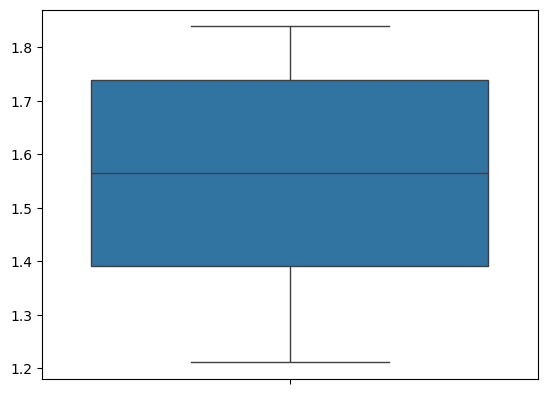

In [106]:
sns.boxplot(reg_predict) #plotagem das predições

Analisando as previsões, vemos que a média está em 1,5 e 1,6 e que a maioria dos valores estão nos dois quartos centrais do plot.  

<Axes: ylabel='transactionRevenue'>

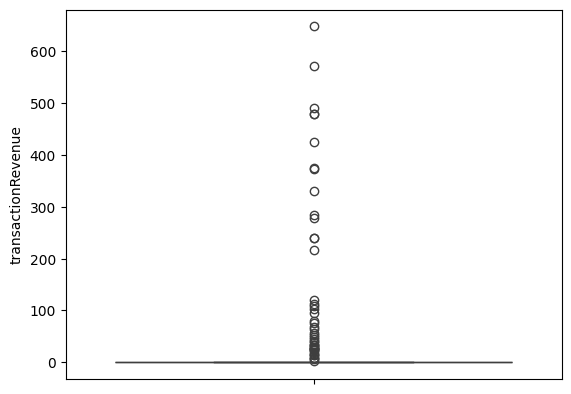

In [107]:
sns.boxplot(y_test)

A maior parte está entre 0 e 200, com alguns outliers. A partir disso conseguimos observar que as predições estão bem distantes dos valores analisados na base real (usada para teste) <br>
Podemos dizer que é um modelo conservador, que considera uma faixa de valores fora da realidade.

<h2> Melhorando o modelo </h2>
Além das variáveis quantitivas que já utilizamos, vamos agora criar variáveis qualitativas (canal, navegador, mobile ou nao, etc). Vamos agregar isso na base. <br>
Desafios:<br>
- como usar os dados que estão em formato texto?<br>
- como filtrar os dados, cnsiderando que um mesmo usuário pode visitar mais de uma vez?<br><br>

<h3>Como estratégia:</h3>
Vamos considerar os valores quantitativos e qualitativos da primeira e última visita de um mesmo usuário. Com isso, conseguimos entender o comportamento do usuário (ele compra mais na segunda visita? ou na primeira visita?).

In [111]:
visitas_ultima = df.groupby('fullVisitorId', as_index=False) #agrupando por indice
#criando uma nova base considerando apenas as variáveis qualitativas
#vamos usar os dados da última visita
#descobrimos isso com a coluna visitnumber (criada quando um mesmo usuario acessa mais de uma vez. Numeros maiores = ultima visita )

In [112]:
visitas_ultima['visitNumber'].max() #maximo de visita cada usuario

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


In [ ]:
#combinação de visitnumber e os dados do df. Para isso, importante ter CHAVES-UNICAS

In [114]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber']) #dropando os registros duplicados

In [115]:
usuarios_visitas_unicos.shape #vamos ver as linhas apenas com unicas

(12270, 35)

In [ ]:
#agora vamos combinar as informações

In [119]:
visitas = pd.merge(visitas_ultima, usuarios_visitas_unicos, left_on=['fullVisitorId', 'visitNumber'],
                   right_on=['fullVisitorId', 'visitNumber'], how='left')

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed